# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [63]:
%matplotlib inline

import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [19]:
from sklearn.datasets import load_boston
bdata = load_boston()
type(bdata)
#print (bdata)
bdata_df = pd.DataFrame(data= np.c_[bdata['data'],bdata['target']],
                        columns=np.append(bdata['feature_names'],['target']))
#bdat_df=np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

The following commands will provide some basic information about the shape of the data:

In [20]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['feature_names', 'data', 'target', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


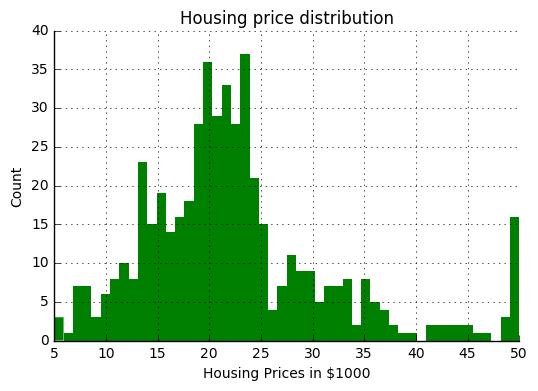

In [21]:
bdata_df.head(5)
bdata_df['target'].hist(color='green',bins=50,edgecolor="none")
xy = plt.axes()
xy.spines['right'].set_color('none') 
xy.spines['top'].set_color('none')
xy.get_xaxis().tick_bottom()
xy.get_yaxis().tick_left()
plt.xlabel('Housing Prices in $1000')
plt.ylabel('Count')
plt.title('Housing price distribution')

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


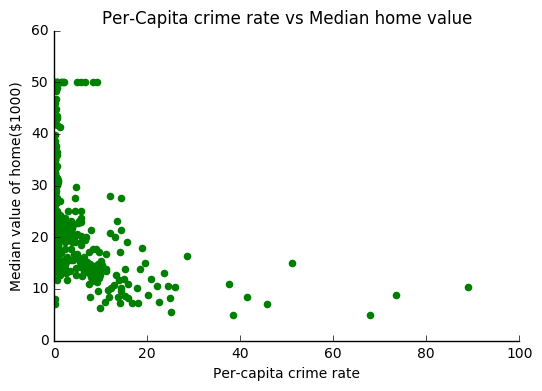

In [22]:
bdata_df.head(5)
plt.scatter(bdata_df.CRIM,bdata_df.target,color='green')
plt.xlim(0,100)
plt.xlabel('Per-capita crime rate')
plt.ylabel('Median value of home($1000)')
plt.title('Per-Capita crime rate vs Median home value')
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

The series of graphs below explore the relation ship between tax, median home value and distance from employment center.In graph 1, we see that house value drops when tax rates are very high. Graph 2 shows that tax is higher around employment centers.It is popular assumption that urbanization causes house value to go up. We can see that in graph 3.

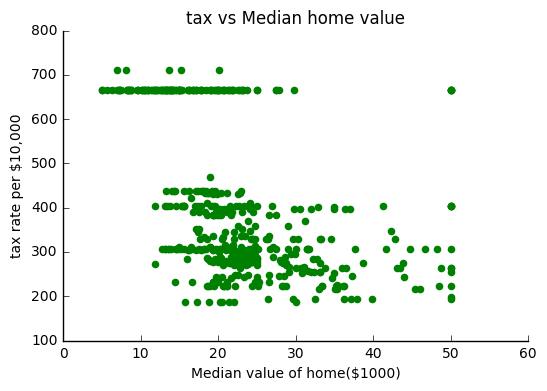

In [23]:
plt.scatter(bdata_df.target,bdata_df.TAX,color='green')
plt.ylabel('tax rate per $10,000')
plt.xlabel('Median value of home($1000)')
plt.title( 'tax vs Median home value')
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

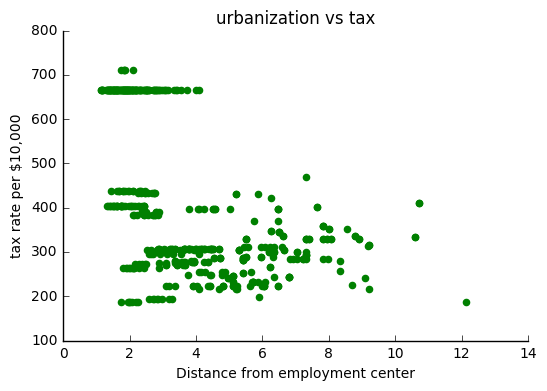

In [24]:
plt.scatter(bdata_df.DIS,bdata_df.TAX,color='green')
plt.ylabel('tax rate per $10,000')
plt.xlabel('Distance from employment center')
plt.title( 'urbanization vs tax')
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

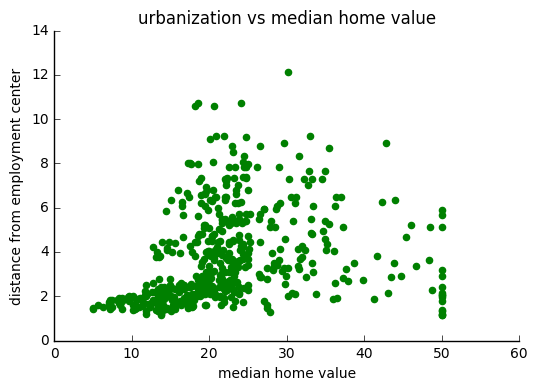

In [25]:
plt.scatter(bdata_df.target,bdata_df.DIS,color='green')
plt.ylabel('distance from employment center')
plt.xlabel('median home value')
plt.title( 'urbanization vs median home value')
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [26]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
predicts=np.array([2,2,3])
yvals=np.array([0,2,6])

def compute_rmse(predicts,yvals):
    i=0 #i used to move array index
    result=np.zeros((predicts.size,1))
    for n in predicts:
        result[i]=predicts[i]-yvals[i] #computing difference between predicted and observed values
        result[i]=result[i]*result[i] #computing square root of each difference
        i=i+1 
    rmse=sum(result)/result.size
    rmse=np.sqrt(rmse) #obtaining root mean
    return rmse
print (compute_rmse(predicts,yvals))

[ 2.081666]


### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [27]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
#using sample funtion to generate training data. 
train_df=bdata_df.sample(frac=0.66)
test_df=bdata_df.drop(train_df.index)
#in later questions, handling the testing and training data as array makes it easier to feed the input variables.
#hence, changing the dataframe to matrix thereby an array.
trainm_df=train_df.as_matrix()
testm_df=test_df.as_matrix()

### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [28]:
# computing rmse betwwen training data and test data.
print (compute_rmse(np.array(np.repeat(train_df.target.mean(),len(train_df))),np.array(train_df.target)))
print (compute_rmse(np.array(np.repeat(test_df.target.mean(),len(test_df))),np.array(test_df.target)))


[ 8.8728716]
[ 9.70891231]


The rmse values are closely related to one another denoting that the test data is handling rather well by the model. Given the sample size between training(336) and test (144), it would be expected that the test data not perform this well.

##Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [29]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
def distance(x1,x2,L):
    x1=np.asarray(x1)
    x2=np.asarray(x2)
    dist = np.power(np.abs(x1-x2),L)
    return np.power(dist.sum(axis=0),float(1)/L)

#testing by computing Eucliedian and Manhattan functions
print (distance((3,4),(6,8),1))
print (distance((6,8),(3,4),2))
print (distance((3,4),(6,8),2))
print (distance((6,8),(3,4),1))

7.0
5.0
5.0
7.0


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


time taken: 1.82
rmse: [ 7.37265138]


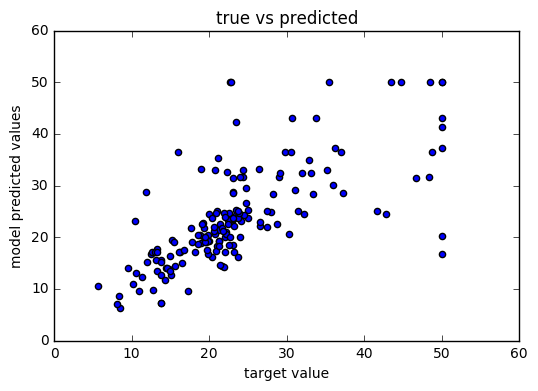

In [30]:
"""
# write your function specification here!
"""
import time, operator
#the following function was written using training and testing dataframes. While it does not error, it seems to throw
#unhandled exceptions while running, breaking connection with kernel
#def basic_knn(test_i,train_i,L):
#    predicted_medv = pd.Series()
#    final=pd.DataFrame(columns=['index','crim','Rm','mdev'])
#    start_t=time.time()
#    for index1, row in test_i.iterrows():
#            for index2,row in train_i.iterrows():
#                    crim_foreach=distance(np.array(test_i.loc[index1,'CRIM']),np.array(train_i.loc[index2,'CRIM']),L)
#                    rm_foreach=distance(np.array(test_i.loc[index1,'RM']),np.array(train_i.loc[index2,'RM']),L)
#                    final=final.set_value(index2,crim_foreach,rm_foreach,train_i.target)
#           final.sort_values('crim')
#           a=final['mdev'].iloc[0]
#           predicted_medv.append(pd.Series([a]))
#   end_t = time.time() - start_t
#   print (end_t)
    #print (compute_rmse(predicted_medv,test_i.target))          

#basic_knn(test_df,train_df,2)


# Basic Knn function written using training and test data as arrays.
def basic_knn(testm_df, trainm_df, L):
    start_time = time.time()
    result = []
    for i in testm_df:
        init_dist = []
        for j in trainm_df:
            dist = distance(j[:-1],i[:-1],L)
            init_dist.append((j[j.shape[0]-1], dist))
            init_dist.sort(key = operator.itemgetter(1),reverse = False)           
        result.append(init_dist[0])
    result = np.array(result)
    total_t = float(round(time.time() - start_time,2))
    return result[:,0],compute_rmse(testm_df[:,(testm_df.shape[1]-1)],result[:,0]),total_t

result,rmse,timet=basic_knn(testm_df,trainm_df,2)
print('time taken:',timet)
print('rmse:',rmse)
plt.scatter(test_df['target'],result)
plt.xlabel('target value')
plt.ylabel('model predicted values')
plt.title('true vs predicted')

Total time taken by the knn function is 1.65

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [68]:
"""
# write your function specification here!
"""
def norm(data_df):
        for col in range(0,(data_df.shape[1]-1)):
            mean=data_df[:,col].mean()
            std=data_df[:,col].std()
            data_df[:,col] = (data_df[:,col]-mean)/std
        return data_df
tr_normal=norm(trainm_df[:,(0,5,13)])
test_normal=norm(testm_df[:,(0,5,13)])


result,rmse,timet=basic_knn(test_normal,tr_normal,2)
print('rmse from normalized dataset:',rmse)


rmse from normalized dataset: [ 7.17777578]


While rmse on normalized data is lower than trivial baseline model rsme, it is higher that that from knn on non-normalized data

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

[ 7.17777578] 2.07
[ 7.3459014] 1.99
[ 7.25470176] 2.08
[ 7.14194537] 1.69


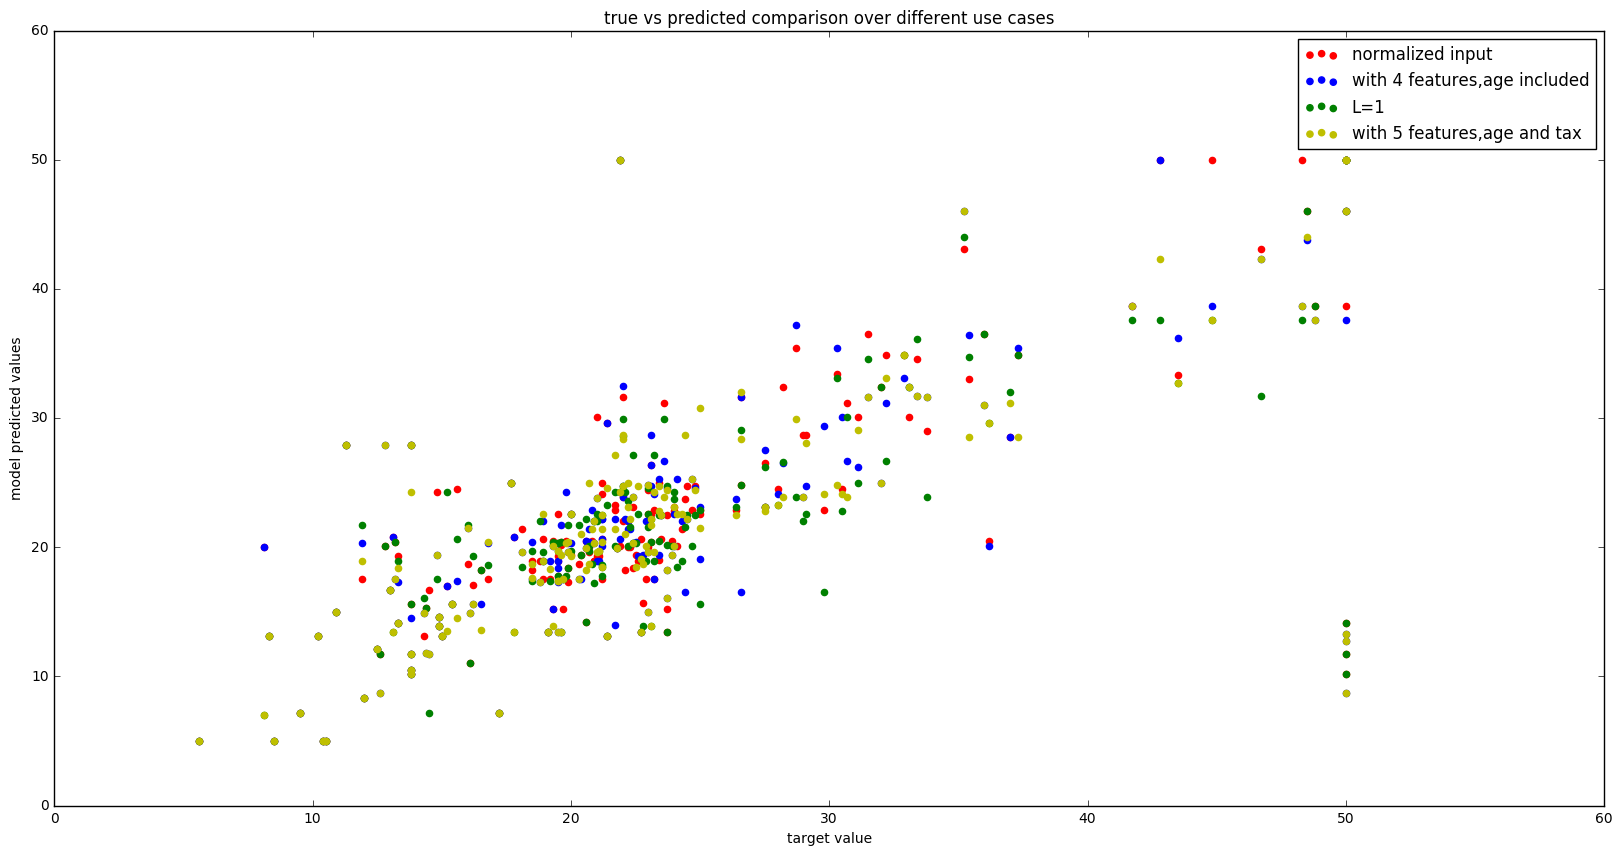

In [76]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''
result,rmse,timet=basic_knn(norm(testm_df[:,(0,5,13)]),norm(trainm_df[:,(0,5,13)]),2)
print(rmse,timet)
plt.figure(figsize=(20,10))
plt.scatter(testm_df[:,13],result,color='r',label='normalized input')
plt.xlabel('target value')
plt.ylabel('model predicted values')
plt.title('true vs predicted comparison over different use cases')


result,rmse,timet=basic_knn(norm(testm_df[:,(0,5,6,13)]),norm(trainm_df[:,(0,5,6,13)]),2)
print(rmse,timet)

plt.scatter(testm_df[:,13],result,color='b',label='with 4 features,age included')
plt.xlabel('target value')
plt.ylabel('model predicted values')
plt.title('true vs predicted')

result,rmse,timet=basic_knn(norm(testm_df[:,(0,5,9,13)]),norm(trainm_df[:,(0,5,9,13)]),1)
print(rmse,timet)
plt.scatter(testm_df[:,13],result,color='g',label="L=1")
plt.xlabel('target value')
plt.ylabel('model predicted values')
plt.title('true vs predicted')

result,rmse,timet=basic_knn(norm(testm_df[:,(0,5,6,9,13)]),norm(trainm_df[:,(0,5,6,9,13)]),2)
print(rmse,timet)

plt.scatter(testm_df[:,13],result,color='y',label='with 5 features,age and tax')
plt.xlabel('target value')
plt.ylabel('model predicted values')
plt.title('true vs predicted comparison over different use cases')
plt.legend()

Lowest RSME is obtained when 5 features are included and L=2. COmparison of target vs result is shown on the graph above.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [74]:
#from sklearn.cross_validation import KFold
def iterator_kfold(bdata_df,L,op,k):
    rmse = 0
    t_total = 0
    for i in range(10):
        train_data=bdata_df.sample(frac=0.90)
        test_data=bdata_df.drop(train_df.index)
        train_data=train_data.as_matrix()
        test_data=test_data.as_matrix()
        if op=='k-NN':
            p,r,t = KNN(norm(test_data[:,:]), norm(train_data[:,:]),2,k)
        if op=='NN':
            p,r,t = basic_knn(norm(test_data[:,:]), norm(train_data[:,:]),2)
        rmse += r
        t_total += t
    return (rmse/10),t_total

print("Average RMSE across 10 iterations and total running time:",iterator_kfold(bdata_df,2,'NN',3))

Average RMSE across 10 iterations and total running time: (array([ 1.56992675]), 28.89)


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [72]:
#function for KNN
def KNN(test_data, train_data, L,k):
    s_time = time.time()
    result = []
    for i in test_data:
        init_dist = []
        for j in train_data:
            final_dist = distance(j[:-1],i[:-1],L)
            init_dist.append((j[j.shape[0]-1], final_dist))
            init_dist.sort(key = operator.itemgetter(1),reverse = False)
        result.append(np.mean(init_dist[0:k],axis = 0))
    result = np.array(result)
    total_t = float(round(time.time() - s_time,2))
    return result[:,0],compute_rmse(test_data[:,(test_data.shape[1]-1)],result[:,0]),total_t

r,t = iterator_kfold(bdata_df,2,'k-NN',3)
print("rmse:",r,"time",t)

rmse: [ 3.46630955] time 28.310000000000002


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [17]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''



### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*